In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210316_neural_weighted_behavior/master_X.npy"
X = np.load(file)

In [3]:
X.shape

(49, 9, 2000, 3384)

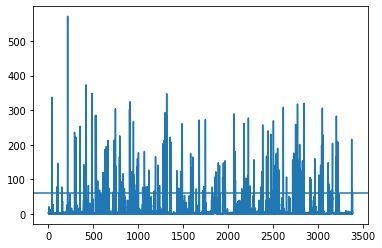

In [6]:
fps=50
plt.plot(X[10,2,750,:]* 180 / np.pi * fps)
plt.axhline(60)

In [27]:
### want to clip at the same threshold as figure 4 (PCs) and figure 5 (GLM)
# for these it is at 60 deg/sec for rotation and 1.8mm/sec for forward
# the behavior X matrix is in original fictrac units (rad/frame)
# so convert these thresholds to rad/frame

conversion_factor = 180 / np.pi * fps
thresh = 60
rot_thresh = thresh/conversion_factor

sphere_radius = 4.5e-3
conversion_factor = sphere_radius * fps * 1000
thresh = 1.8
fwd_thresh = thresh/conversion_factor

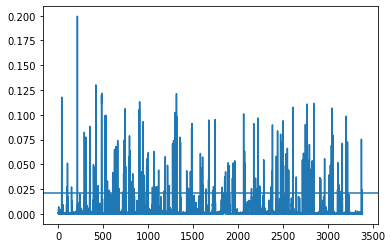

In [31]:
fps=50
plt.plot(X[10,2,750,:])
plt.axhline(rot_thresh)

In [45]:
############
### CLIP ###
############

X_clipped = X.copy()
X_clipped[:,:,500:1500,:][X[:,:,500:1500,:] < rot_thresh] = 0
X_clipped[:,:,:500,:][X[:,:,:500,:] < fwd_thresh] = 0

In [48]:
os.mkdir("/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220921_neural_weighted_behavior/")

In [49]:
save_file = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20220921_neural_weighted_behavior/master_X_clipped"
np.save(save_file, X_clipped)

(1000, 2000)

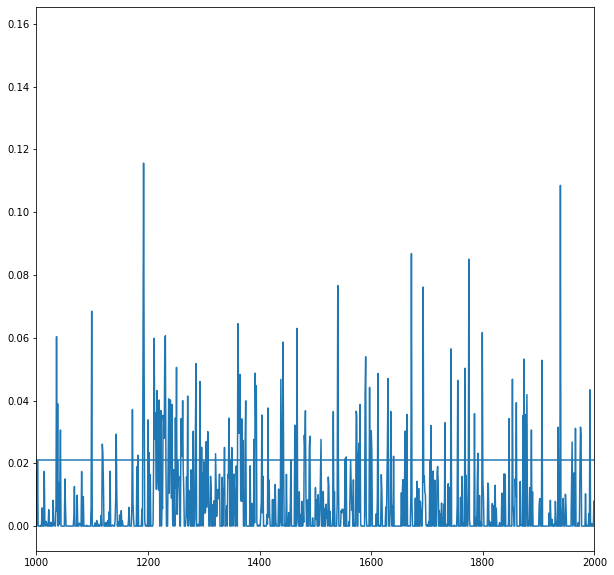

In [44]:
plt.figure(figsize=(10,10))
plt.plot(X[10,0,750,:])
plt.axhline(rot_thresh)
plt.xlim(1000,2000)

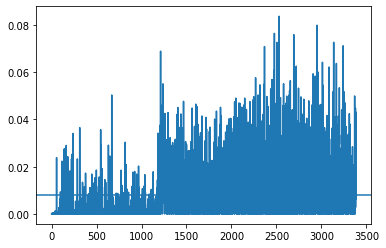

In [30]:
fps=50
plt.plot(X[10,0,250,:])
plt.axhline(fwd_thresh)